<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/genetic_similarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt: generate 5 length dna sequence array

import random

def generate_dna_sequence(length):
    nucleotides = ['A', 'C', 'G', 'T']
    sequence = ''.join(random.choice(nucleotides) for _ in range(length))
    return sequence

dna_sequences = [generate_dna_sequence(20) for _ in range(100)]
dna_sequences


['TTCTTCCGTTTCGGTTGACT',
 'GTACCACTAAAAACTTGAGA',
 'TTGGGCTATCTGTCGGAGGT',
 'AGTCTTGGAGGCACGATAAA',
 'GCTCCGATTAGCTCCCCGCG',
 'CCAAGCAAACTCACCTTCGT',
 'TACTAAATCCTACTGAATGC',
 'GACGAATAACGACAAGGAGT',
 'CACCACGTTAGATAGATTCC',
 'TATAGCCTCCGTCAAACCTC',
 'CCGAGATAAGGTAAGAACCA',
 'AGCGCAGCGGACCGTTTATA',
 'CCGTAGGACTTCGATTTCTT',
 'CACAATTGCAGTCTAGGACA',
 'TTATGGTTGATCAAATGTAA',
 'TCTGTTCGAGTTTAGATTGT',
 'GTTCCCTCGGATCTACGCAA',
 'TAGAGTACCCGTAGTGAATC',
 'AAGGTAGTATCGATCCGGCC',
 'GTGAACACTCCGACAATTGA',
 'GCGAGGATAAGGGAGATATC',
 'GGGCTTAGCGCGTATCAAAT',
 'TGATCCCCGCCAGCACGTGA',
 'TTTGTTAGCGACGTTTGTTT',
 'GGACGGGTCAGTTACGGTCC',
 'CGGTGCATAATGCTTGATGC',
 'TTATGAGAGCAAAGGTCAAC',
 'GAGGCTAGCGTAAGGCTCAG',
 'CCCAGTATAAGTGTTCTTTC',
 'TCCTGAACACGGATTATTGG',
 'CGACAAGGGGGCCACTATTC',
 'TTCGTGAACGCGCCAAATAG',
 'AGGTCTTAAACGGTAAGTTA',
 'AAGCCTGACTCACCTGAGTG',
 'TCGGACCTTGTATCAAGATT',
 'GCAAACAACAATAATCGGAA',
 'ATAGTGCTGCTCATGCAGTA',
 'CGGCCGAAGCGCCATAAGCA',
 'CTCGGATAGGCCATGGCACT',
 'AACACCAACCTATGAGGAAA',


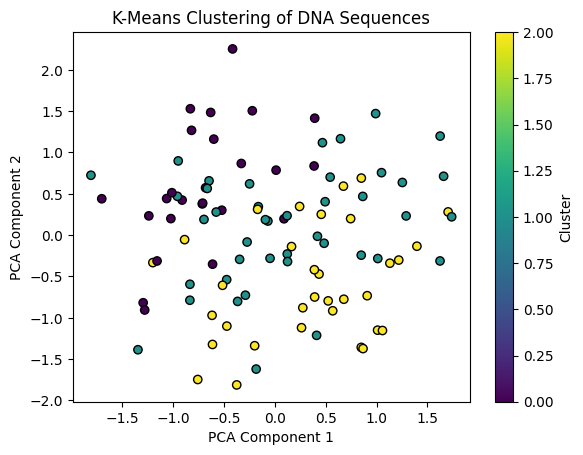

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Example DNA sequences
#dna_sequences = ["ATGCGT", "ATGCGC", "GCTAGC", "CGTATG", "TGCATG", "TGCAGC"]

# One-hot encoding for DNA sequences
def one_hot_encode(sequences):
    encoder = OneHotEncoder(categories=[['A', 'C', 'G', 'T']], sparse_output=False)
    encoded_sequences = np.array([encoder.fit_transform(np.array(list(seq)).reshape(-1, 1)).flatten() for seq in sequences])
    return encoded_sequences

X = one_hot_encode(dna_sequences)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of DNA Sequences")
plt.colorbar(label="Cluster")
plt.show()
